# Import Modules

In [163]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

from spectral.algorithms.algorithms import TrainingClass, TrainingClassSet
from Daten_einlesen.find_path_nextcloud import find_path_nextcloud
from spectral import *
import numpy as np


# Read Data

In [164]:
# Pfad Nextcloud bestimmen
path_nextcloud = find_path_nextcloud()

# Pfade definieren
path_hdr = path_nextcloud + 'Daten_Gyrocopter/Oldenburg/Teilbilder/grid_250_250/Teilbild_Oldenburg_00000000_00000000_0_0_.hdr'
path_dat = path_hdr[:-4] + '.dat'

# Teilbild laden
img = envi.open(file=path_hdr, image=path_dat)

# Laden der Bildinformationen
arr_img = img.load()

arr_img[:,:,108] = arr_img[:,:,108]*2

In [165]:
print(f'Height: {arr_img.shape[0]}\nWidth: {arr_img.shape[1]}\nBands: {arr_img.shape[2]}')

Height: 250
Width: 250
Bands: 109


In [166]:
# l = []
# for i in range(arr_img.shape[2]):
#     l.append(arr_img[:,:,i])

l = []
l.append(arr_img[:,:,59])
l.append(arr_img[:,:,26])
l.append(arr_img[:,:,1])
l.append(arr_img[:,:,108])

In [167]:
arr_st = np.stack(l)

In [168]:
print(f'Height: {arr_st.shape[1]}\nWidth: {arr_st.shape[2]}\nBands: {arr_st.shape[0]}')


Height: 250
Width: 250
Bands: 4


# Preprocessing 

In [175]:
x = arr_img[:,:,(1,26,59,108)]
x.shape

(250, 250, 4)

In [178]:
x.reshape(-1, 4).shape

(62500, 4)

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_data = x.reshape(-1, 4)

scaler = StandardScaler().fit(X_data)

X_scaled = scaler.transform(X_data)

X_scaled.shape

(62500, 4)

## Principal Component Analysis (PCA)

In [180]:
pca = PCA(n_components = 4)

pca.fit(X_scaled)

data = pca.transform(X_scaled)

In [181]:
data.shape

(62500, 4)

In [182]:
pca.explained_variance_ratio_

array([0.6448074 , 0.2535064 , 0.07585613, 0.02583007], dtype=float32)

In [183]:
np.sum(pca.explained_variance_ratio_)

1.0

## Visualize Bands after PCA

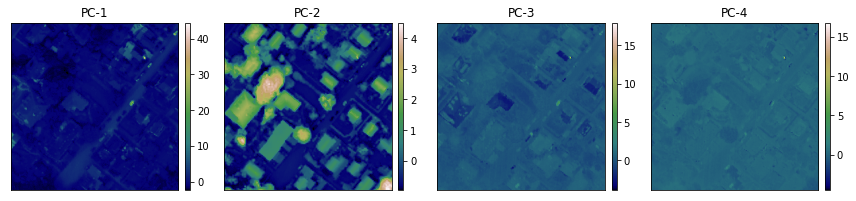

In [184]:
ep.plot_bands(np.moveaxis(data.reshape((250, 250, data.shape[1])), -1, 0),
              cmap = 'gist_earth',
              cols = 4,
              title = [f'PC-{i}' for i in range(1,5)])

plt.show()

# *k* - Means 

In [191]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 15, random_state = 11)

kmeans.fit(data)



labels = kmeans.predict(data)


np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## Visualize Clusters

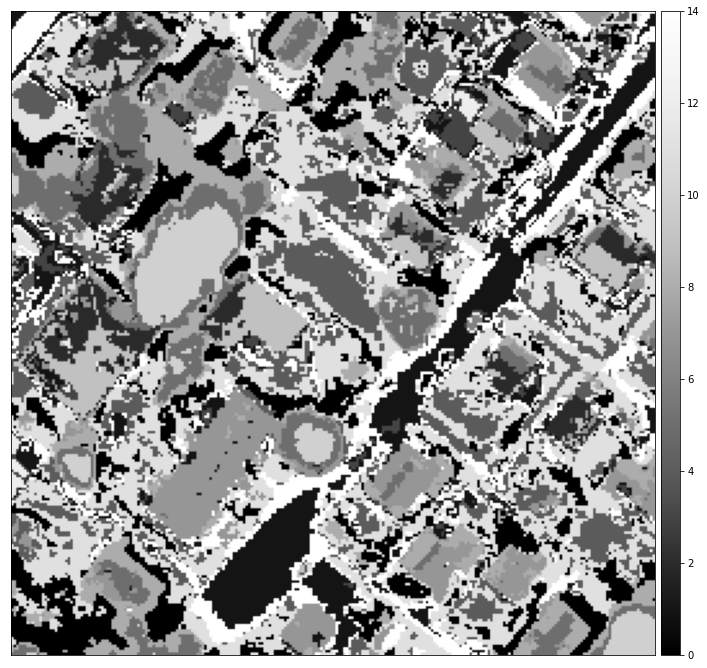

In [192]:
ep.plot_bands(labels.reshape(250, 250))
plt.show()

Interactive plot using Plotly

In [ ]:
import plotly.express as px

fig = px.imshow(labels.reshape(250, 250))

fig.update_xaxes(showticklabels=False)

fig.update_yaxes(showticklabels=False)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)



---

